# Esimerkki 2

Sisältää mm.

- Nan -arvojen määrän selvittäminen

**JAMK examples #2:** 02_eda_sales_erros

Ladataan käytettävät paketit.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Luetaan aineisto

In [2]:
# Load the dataset
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/sales_data.csv"
df = pd.read_csv(csvUrl)

df.head()

,date,category,sales,price,customer_age,customer_gender
0,2023-02-18,Clothing,17,65.53,31,Male
1,2023-05-26,Books,18,431.78,26,NaN
2,2023-02-17,Books,15,400.98,31,Female
3,2023-05-20,Monitors,15,142.19,37,NaN
4,2023-03-31,Monitors,10,399.28,45,NaN


#### Nan -arvojen määrä

Pandas [count-metodi](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) käy läpi aineiston sarakkeittain ja tulostaa jokaiselle kuinka monta ei Nan -arvoa sarake sisältää.

In [3]:
# Data is not Pre-processed
print(f"Number of rows in data: {df.count()}")
# There ara NaN values in data

Number of rows in data: date               1000
category            817
sales              1000
price              1000
customer_age       1000
customer_gender     677
dtype: int64


Tulostetaa myös normaalit yhteenvetotiedot:

In [4]:
df.describe()

,sales,price,customer_age
count,1000.000000,1000.000000,1000.000000
mean,10.517000,253.495390,42.150000
std,5.667966,142.591605,14.289636
min,1.000000,1.980000,18.000000
25%,6.000000,131.010000,29.750000
50%,11.000000,255.380000,42.000000
75%,15.000000,376.185000,55.000000
max,20.000000,499.630000,65.000000


Sekä sarkkeiden tietotyypit:

In [5]:
df.dtypes

date                object
category            object
sales                int64
price              float64
customer_age         int64
customer_gender     object
dtype: object

### Ryhmittely

Lasketaan [groupby -metodin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) avulla kunkin tuoteryhmän kokonaismyynti.

Category sarake sisältää puuttuvia arvoja. Oletuksena groupby-metodi tiputtaa nämä sarakkeet pois. Parametrin dropna=False avulla NA-arvoja sisältävät rivit huomioidaan omana kokonaisuutenaan.

In [8]:
# sales_by_category = df.groupby('category')['sales'].sum()
# df.groupby('category', dropna=False)['sales'].sum()
sales_by_category = df.groupby('category')['sales'].sum()
sales_by_category

category
Books        1460
Clothing     1735
Computers    1816
Monitors     1811
Phones       1800
Name: sales, dtype: int64

### Visualisointi

Visualisoidaan tuoteryhmien myyntiä muutaman graafin avulla.

#### Pylväsdiagrammi

Puhtaan Matplotlib kaavion sijasta operoidaan Seaborn tulosteella.

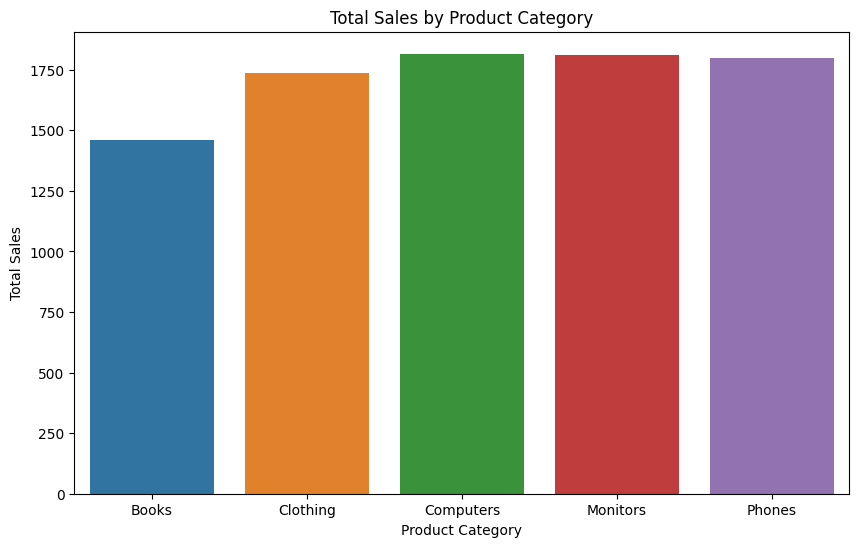

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(
    x = sales_by_category.index,
    y = sales_by_category.values
)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.show()

#### Hajontakuvio

Palataan alkuperäiseen materiaaliin ja tulostetaan hinnan ja myynnin välistä yhteyttä kuvaava hajontakuvioa ... joka ei ainakaan ensisilmäyksellä paljasta mitään erityistä säännönmukaisuutta.

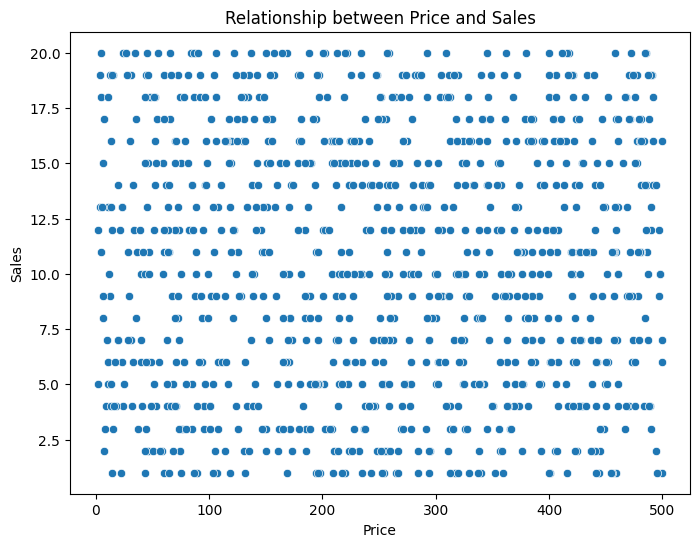

In [11]:
# Explore the relationship between price and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sales', data=df)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Relationship between Price and Sales')
plt.show()

#### Histogrammi

Lopuksi eri ikäisten suorittamien asiakkaiden ostotapahtumien määrää kuvaava histogrammi. Ikäryhmää kuvaava pylväs erittelee myös ostosten määrän sukupuolen mukaan jaoteltuna.

- em. graafityypissä alimmaisen luokan arvoja (tässä tapauksella Female) on helppo vertailla keskenään. Muiden luokkien osalta vertailu onkin jo sitten hankalampaa.

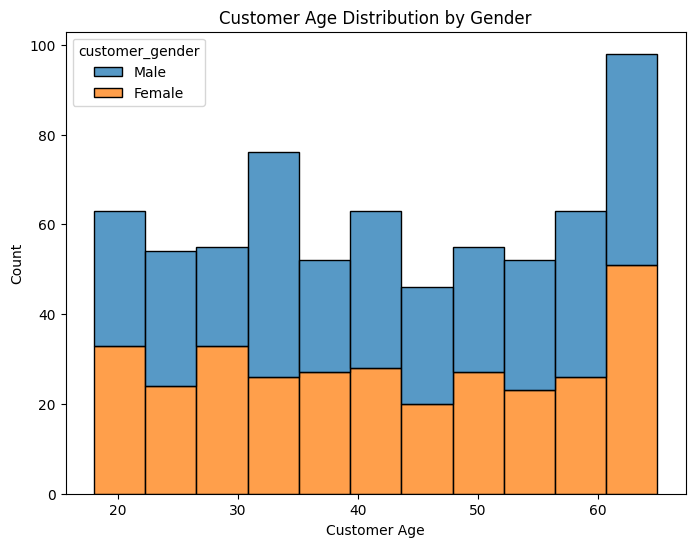

In [12]:
# Analyze customer demographics
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='customer_age', hue='customer_gender', multiple='stack')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Customer Age Distribution by Gender')
plt.show()